# Math Writer 1.0v<br/>

Author : MJStudio<br/><br/>

Description : <br/><br/>
&nbsp;&nbsp;&nbsp;&nbsp;Project for GIST 2018 software application and coding class<br/><br/>
&nbsp;&nbsp;&nbsp;&nbsp;Unity + Node.js + Tensorflow = Simple Machine Learning Math Game!

In [7]:
#Socket IO for Network
from socketIO_client import SocketIO, LoggingNamespace
EVENT_CODE="TENSORFLOW"
EVENT_CODE_NON_MNIST="TENSORFLOW_NON_MNIST"
#We encode, decode image as a base64 string
import base64
#openCV is used for preprocess raw image
import cv2 as cv2
import numpy as np
from matplotlib import pyplot as plt
#TENSORFLOW!
import tensorflow as tf
import random
import math
#We parse data with json in network
import json

import random

#MNIST Data sets
from tensorflow.examples.tutorials.mnist import input_data
mnist=input_data.read_data_sets("MNIST_data/",one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


### Set Python Global Variables ###

In [2]:
learning_rate=0.001
nb_classes=10
keep_prob=tf.placeholder(dtype=tf.float32,name='keep_prob')

tf.set_random_seed(777)

### Pre-Predict Model <br/><br/>

layer wide = 256(layer1)<br/>

In [11]:
layer_wide_pre=256

xy_pre=np.loadtxt('mnist-non_mnist.csv',delimiter=',',dtype=np.float32)
x_data_pre=xy_pre[:,1:]
x_data_pre=x_data_pre/255.0

y_data_pre=xy_pre[:,[0]]

X_pre=tf.placeholder(tf.float32,[None,784])
Y_pre=tf.placeholder(tf.float32,[None,1])

W1_pre=tf.Variable(tf.random_normal([784,layer_wide_pre]))
b1_pre=tf.Variable(tf.random_normal([layer_wide_pre]))
layer1_pre=tf.sigmoid(tf.matmul(X_pre,W1_pre)+b1_pre)

W2_pre=tf.Variable(tf.random_normal([layer_wide_pre,1]))
b2_pre=tf.Variable(tf.random_normal([1]))
hypothesis_pre=tf.sigmoid(tf.matmul(layer1_pre,W2_pre)+b2_pre)

epsilon=1e-6

cost_pre=-tf.reduce_mean(Y_pre * tf.log(hypothesis_pre+epsilon)\
                         +(1-Y_pre)*tf.log(1-hypothesis_pre+epsilon))
train_pre=tf.train.GradientDescentOptimizer(learning_rate=1e-3).minimize(cost_pre)

predicted_pre=tf.cast(hypothesis_pre>0.5,dtype=tf.float32)
accuracy_pre=tf.reduce_mean(tf.cast(tf.equal(predicted_pre,Y_pre),dtype=tf.float32))

### Pre-Predict Model Training & Test

In [95]:
sess_pre=tf.Session()
sess_pre.run(tf.global_variables_initializer())

for step in range(5001):
    feed_dict_pre={X_pre:x_data_pre,Y_pre:y_data_pre}
    _c,_=sess_pre.run([cost_pre,train_pre],feed_dict=feed_dict_pre)
    if step % 1000 == 0:
        print(step,'Cost :',_c)
h,c,a=sess_pre.run([hypothesis_pre,predicted_pre,accuracy_pre],feed_dict=feed_dict_pre)
print("Accuracy\n",a)
                    

0 Cost : 2.6565785


KeyboardInterrupt: 

[MNIST Image]


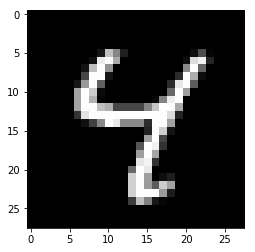

This is MNIST image


[Non-MNIST Image]


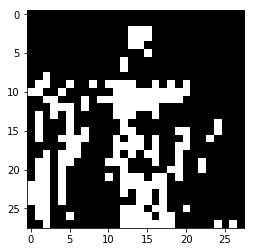

This is not MNIST image


In [105]:
xy_test=np.loadtxt('mnist-non_mnist_test.csv',delimiter=',',dtype=np.float32)
r_mnist=random.randint(1,9)
r_non_mnist=random.randint(11,19)


mnist_test=xy_test[r_mnist,1:].reshape(1,784)
non_mnist_test=xy_test[r_non_mnist,1:].reshape(1,784)

sess_pre.run(tf.global_variables_initializer())

print('[MNIST Image]')
plt.imshow(mnist_test.reshape(28,28),cmap='gray')
plt.show()
is_mnist_test=sess_pre.run(predicted_pre,feed_dict={X_pre:mnist_test})
is_mnist_test=int(is_mnist_test[0][0].item())
if is_mnist_test==0:
    print('This is not MNIST image')
else :
    print('This is MNIST image')

print('\n\n[Non-MNIST Image]')
plt.imshow(non_mnist_test.reshape(28,28),cmap='gray')
plt.show()
is_mnist_test=sess_pre.run(predicted_pre,feed_dict={X_pre:non_mnist_test})
is_mnist_test=int(is_mnist_test[0][0].item())
if is_mnist_test==0:
    print('This is not MNIST image')
else :
    print('This is MNIST image')


### First MNIST Model <br/><br/>

layer wide = 256(layer1), 256(layer2)<br/>
drop out rate = 0.7(layer1), 0.7(layer2)

In [108]:
layer_wide_1=256
keep_prob_training_1=0.7

with tf.name_scope('Model_1'):
    X_1=tf.placeholder(tf.float32,[None,784])
    Y_1=tf.placeholder(tf.float32,[None,nb_classes])

    with tf.name_scope('Layer1_1'):
        W1_1=tf.get_variable('Weight1_1',shape=[784,layer_wide_1],initializer=\
                             tf.contrib.layers.xavier_initializer())
        b1_1=tf.Variable(tf.random_normal([layer_wide_1],dtype=tf.float32),name='biases1_1')
        layer1_1=tf.nn.relu(tf.matmul(X_1,W1_1)+b1_1)
        layer1_1=tf.nn.dropout(layer1_1,keep_prob=keep_prob)
    with tf.name_scope('Layer2_1'):
        W2_1=tf.get_variable('Weight2_1',shape=[layer_wide_1,layer_wide_1],initializer=\
                             tf.contrib.layers.xavier_initializer())
        b2_1=tf.Variable(tf.random_normal([layer_wide_1],dtype=tf.float32),name='biases2_1')
        layer2_1=tf.nn.relu(tf.matmul(layer1_1,W2_1)+b2_1)
        layer2_1=tf.nn.dropout(layer2_1,keep_prob=keep_prob)
    with tf.name_scope('Hypothesis_1'):
        W3_1=tf.get_variable('Weight3_1',shape=[layer_wide_1,nb_classes],initializer=\
                             tf.contrib.layers.xavier_initializer())
        b3_1=tf.Variable(tf.random_normal([nb_classes],name='biases3_1'))
        logits_1=tf.matmul(layer2_1,W3_1)+b3_1
        hypothesis_1=tf.nn.softmax(logits_1,name='Hypothesis_1')

    cost_1=tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits_1,labels=Y_1)
    cost_1=tf.reduce_mean(cost_1)
    train_1=tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost_1)

    is_correct_1=tf.equal(tf.argmax(hypothesis_1,1),tf.argmax(Y_1,1))
    accuracy_1=tf.reduce_mean(tf.cast(is_correct_1,tf.float32))

### Second MNIST Model <br/><br/>

layer wide = 512(layer1), 512(layer2)<br/>
drop out rate = 0.5(layer1), 0.5(layer2)

In [109]:
layer_wide_2=512
keep_prob_training_2=0.5

with tf.name_scope('Model_2'):
    X_2=tf.placeholder(tf.float32,[None,784])
    Y_2=tf.placeholder(tf.float32,[None,nb_classes])

    with tf.name_scope('Layer1_2'):
        W1_2=tf.get_variable('Weight1_2',shape=[784,layer_wide_2],initializer=tf.contrib.layers.xavier_initializer())
        b1_2=tf.Variable(tf.random_normal([layer_wide_2],dtype=tf.float32),name='biases1_2')
        layer1_2=tf.nn.relu(tf.matmul(X_2,W1_2)+b1_2)
        layer1_2=tf.nn.dropout(layer1_2,keep_prob=keep_prob)
    with tf.name_scope('Layer2_2'):
        W2_2=tf.get_variable('Weight2_2',shape=[layer_wide_2,layer_wide_2],initializer=tf.contrib.layers.xavier_initializer())
        b2_2=tf.Variable(tf.random_normal([layer_wide_2],dtype=tf.float32),name='biases2_2')
        layer2_2=tf.nn.relu(tf.matmul(layer1_2,W2_2)+b2_2)
        layer2_2=tf.nn.dropout(layer2_2,keep_prob=keep_prob)
    with tf.name_scope('Hypothesis_2'):
        W3_2=tf.get_variable('Weight3_2',shape=[layer_wide_2,nb_classes],initializer=tf.contrib.layers.xavier_initializer())
        b3_2=tf.Variable(tf.random_normal([nb_classes],name='biases3_2'))
        logits_2=tf.matmul(layer2_2,W3_2)+b3_2
        hypothesis_2=tf.nn.softmax(logits_2,name='Hypothesis_2')

    cost_2=tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits_2,labels=Y_2)
    cost_2=tf.reduce_mean(cost_2)
    train_2=tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost_2)

    is_correct_2=tf.equal(tf.argmax(hypothesis_2,1),tf.argmax(Y_2,1))
    accuracy_2=tf.reduce_mean(tf.cast(is_correct_2,tf.float32)) 

### Third MNIST Model <br/><br/>

layer wide = 128(layer1), 128(layer2)<br/>
drop out rate = 0.8(layer1), 0.8(layer2)

In [110]:
layer_wide_3=128
keep_prob_training_3=0.8

with tf.name_scope('Model_3'):
    X_3=tf.placeholder(tf.float32,[None,784])
    Y_3=tf.placeholder(tf.float32,[None,nb_classes])

    with tf.name_scope('Layer1_3'):
        W1_3=tf.get_variable('Weight1_3',shape=[784,layer_wide_3],initializer=tf.contrib.layers.xavier_initializer())
        b1_3=tf.Variable(tf.random_normal([layer_wide_3],dtype=tf.float32),name='biases1_3')
        layer1_3=tf.nn.relu(tf.matmul(X_3,W1_3)+b1_3)
        layer1_3=tf.nn.dropout(layer1_3,keep_prob=keep_prob)
    with tf.name_scope('Layer2_3'):
        W2_3=tf.get_variable('Weight2_3',shape=[layer_wide_3,layer_wide_3],initializer=tf.contrib.layers.xavier_initializer())
        b2_3=tf.Variable(tf.random_normal([layer_wide_3],dtype=tf.float32),name='biases2_3')
        layer2_3=tf.nn.relu(tf.matmul(layer1_3,W2_3)+b2_3)
        layer2_3=tf.nn.dropout(layer2_3,keep_prob=keep_prob)
    with tf.name_scope('Hypothesis_3'):
        W3_3=tf.get_variable('Weight3_3',shape=[layer_wide_3,nb_classes],initializer=tf.contrib.layers.xavier_initializer())
        b3_3=tf.Variable(tf.random_normal([nb_classes],name='biases3_3'))
        logits_3=tf.matmul(layer2_3,W3_3)+b3_3
        hypothesis_3=tf.nn.softmax(logits_3,name='Hypothesis_3')

    cost_3=tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits_3,labels=Y_3)
    cost_3=tf.reduce_mean(cost_3)
    train_3=tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost_3)

    is_correct_3=tf.equal(tf.argmax(hypothesis_3,1),tf.argmax(Y_3,1))
    accuracy_3=tf.reduce_mean(tf.cast(is_correct_3,tf.float32)) 

### Declare Tensor Board Variables ###

In [111]:
#Tensor Board
w1_hist_1=tf.summary.histogram('weight1-Model_1',W1_1)
b1_hist_1=tf.summary.histogram('biases1-Model_1',b1_1)
layer1_hist_1=tf.summary.histogram('layer1-Model_1',layer1_1)
w2_hist_1=tf.summary.histogram('weight2-Model_1',W2_1)
b2_hist_1=tf.summary.histogram('biases2-Model_1',b2_1)
layer2_hist_1=tf.summary.histogram('layer2-Model_1',layer2_1)
w3_hist_1=tf.summary.histogram('weight3-Model_1',W3_1)
b3_hist_1=tf.summary.histogram('biases3-Model_1',b3_1)
cost_hist_1=tf.summary.histogram('cost-Model_1',cost_1)
hypothesis_hist_1=tf.summary.histogram('hypothesis-Model_1',hypothesis_1)


w1_hist_2=tf.summary.histogram('weight1-Model_2',W1_2)
b1_hist_2=tf.summary.histogram('biases1-Model_2',b1_2)
layer1_hist_2=tf.summary.histogram('layer1-Model_2',layer1_2)
w2_hist_2=tf.summary.histogram('weight2-Model_2',W2_2)
b2_hist_2=tf.summary.histogram('biases2-Model_2',b2_2)
layer2_hist_2=tf.summary.histogram('layer2-Model_2',layer2_2)
w3_hist_2=tf.summary.histogram('weight3-Model_2',W3_2)
b3_hist_2=tf.summary.histogram('biases3-Model_2',b3_2)
cost_hist_2=tf.summary.histogram('cost-Model_2',cost_2)
hypothesis_hist_2=tf.summary.histogram('hypothesis-Model_2',hypothesis_2)

w1_hist_3=tf.summary.histogram('weight1-Model_3',W1_3)
b1_hist_3=tf.summary.histogram('biases1-Model_3',b1_3)
layer1_hist_3=tf.summary.histogram('layer1-Model_3',layer1_3)
w2_hist_3=tf.summary.histogram('weight2-Model_3',W2_3)
b2_hist_3=tf.summary.histogram('biases2-Model_3',b2_3)
layer2_hist_3=tf.summary.histogram('layer2-Model_3',layer2_3)
w3_hist_3=tf.summary.histogram('weight3-Model_3',W3_3)
b3_hist_3=tf.summary.histogram('biases3-Model_3',b3_3)
cost_hist_3=tf.summary.histogram('cost-Model_3',cost_3)
hypothesis_hist_3=tf.summary.histogram('hypothesis-Model_3',hypothesis_3)


### Tensor Board, Global Variable Tensor Initialization ###

In [112]:
sess=tf.Session()

#Tensor Board Initialization
merged_summary_1=tf.summary.merge([w1_hist_1,b1_hist_1,layer1_hist_1,w2_hist_1,b2_hist_1,\
                                  layer2_hist_1,w3_hist_1,b3_hist_1,hypothesis_hist_1])
merged_summary_2=tf.summary.merge([w1_hist_2,b1_hist_2,layer1_hist_2,w2_hist_2,b2_hist_2,\
                                  layer2_hist_2,w3_hist_2,b3_hist_2,hypothesis_hist_2])
merged_summary_3=tf.summary.merge([w1_hist_3,b1_hist_3,layer1_hist_3,w2_hist_3,b2_hist_3,\
                                  layer2_hist_3,w3_hist_3,b3_hist_3,hypothesis_hist_3])

writer_1=tf.summary.FileWriter('./graphs/model_1')
writer_2=tf.summary.FileWriter('./graphs/model_2')
writer_3=tf.summary.FileWriter('./graphs/model_3')

writer_1.add_graph(sess.graph)
writer_2.add_graph(sess.graph)
writer_3.add_graph(sess.graph)

sess.run(tf.global_variables_initializer())

### Let's Train Machines! ###

In [114]:
#epochs count and batch size for learning
training_epochs=5
batch_size=100

### First Model Training

In [115]:
global_step=0
print('*'*30+'Model 1 Training'+'*'*30)
for epoch in range(training_epochs):
    avg_cost=0
    total_batch=int(mnist.train.num_examples/batch_size)
    for i in range(total_batch):
        batch_xs,batch_ys = mnist.train.next_batch(batch_size)
        feed_dict={X_1:batch_xs,Y_1:batch_ys,keep_prob:keep_prob_training_1}
        c,_=sess.run([cost_1,train_1],feed_dict=feed_dict)
        
        #Tensor Board Add Summary
        summary_1=sess.run(merged_summary_1,feed_dict=feed_dict)
        writer_1.add_summary(summary_1,global_step=global_step)
        global_step+=1
        
        avg_cost+=c/total_batch
    print('Epoch:','%04d'%(epoch+1),'cost =','{:.9f}'.format(avg_cost))

accuracy_model_1=accuracy_1.eval(session=sess,\
            feed_dict={X_1:mnist.test.images,Y_1:mnist.test.labels,keep_prob:1.})
print("Accuracy: ",accuracy_model_1)

******************************Model 1 Training******************************
Epoch: 0001 cost = 0.433387964
Accuracy:  0.9514


### Second Model Training

In [116]:
global_step=0
print('*'*30+'Model 2 Training'+'*'*30)
for epoch in range(training_epochs):
    avg_cost=0
    total_batch=int(mnist.train.num_examples/batch_size)
    for i in range(total_batch):
        batch_xs,batch_ys = mnist.train.next_batch(batch_size)
        feed_dict={X_2:batch_xs,Y_2:batch_ys,keep_prob:keep_prob_training_2}
        c,_=sess.run([cost_2,train_2],feed_dict=feed_dict)
        
        #Tensor Board Add Summary
        summary_2=sess.run(merged_summary_2,feed_dict=feed_dict)
        writer_2.add_summary(summary_2,global_step=global_step)
        global_step+=1
        
        avg_cost+=c/total_batch
    print('Epoch:','%04d'%(epoch+1),'cost =','{:.9f}'.format(avg_cost))

accuracy_model_2=accuracy_2.eval(session=sess,\
            feed_dict={X_2:mnist.test.images,Y_2:mnist.test.labels,keep_prob:1.})
print("Accuracy: ",accuracy_model_2)

******************************Model 2 Training******************************
Epoch: 0001 cost = 0.442156352
Accuracy:  0.9555


### Third Model Training

In [117]:
global_step=0
print('*'*30+'Model 3 Training'+'*'*30)
for epoch in range(training_epochs):
    avg_cost=0
    total_batch=int(mnist.train.num_examples/batch_size)
    for i in range(total_batch):
        batch_xs,batch_ys = mnist.train.next_batch(batch_size)
        feed_dict={X_3:batch_xs,Y_3:batch_ys,keep_prob:keep_prob_training_3}
        c,_=sess.run([cost_3,train_3],feed_dict=feed_dict)
        
        #Tensor Board Add Summary
        summary_3=sess.run(merged_summary_3,feed_dict=feed_dict)
        writer_3.add_summary(summary_3,global_step=global_step)
        global_step+=1 
        
        avg_cost+=c/total_batch
    print('Epoch:','%04d'%(epoch+1),'cost =','{:.9f}'.format(avg_cost))

accuracy_model_3=accuracy_3.eval(session=sess,\
            feed_dict={X_3:mnist.test.images,Y_3:mnist.test.labels,keep_prob:1.})
print("Accuracy: ",accuracy_model_3)

******************************Model 3 Training******************************
Epoch: 0001 cost = 0.489243151
Accuracy:  0.9467


### [decideAnswer] Function<br/>

Parameters<br/>
&nbsp;&nbsp;&nbsp;&nbsp;ans1 : predicted answer using first model.<br/>
&nbsp;&nbsp;&nbsp;&nbsp;ans2 : predicted answer using second model.<br/>
&nbsp;&nbsp;&nbsp;&nbsp;ans3 : predicted answer using third model.<br/><br/>

Return<br/>
&nbsp;&nbsp;&nbsp;&nbsp;predcited answer using 3 trained models.<br/><br/>

Description<br/>
&nbsp;&nbsp;&nbsp;&nbsp;This is for ensemble.<br/>
&nbsp;&nbsp;&nbsp;&nbsp;This function will return predicted answer using 3 trained models.

In [118]:
def decideAnswer(ans1,ans2,ans3):
    #If 3 predicted answers are all same, return immediately.
    for i in range(0,10):
        if ans1 == i and ans2 == i and ans3 == i :
            return i
    #If 2 predicted answers are same, return that.
    for i in range(0,10):
        if (ans1 == i and ans2 == i) or (ans1 == i and ans3 == i) or (ans2 == i and ans3 == i):
            return i
    #If predicted answers are all different, return what predicted answer of model having
    #    the biggest accuracy. 
    if (accuracy_model_1 >= accuracy_model_2) and (accuracy_model_1 >= accuracy_model_3):
        return ans1
    elif (accuracy_model_2 >= accuracy_model_3) and (accuracy_model_2 >= accuracy_model_1):
        return ans2
    else:
        return ans3
    

### MNIST Ensemble Model Test

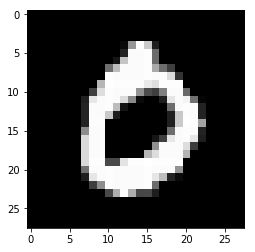

Model 1 Prediction : 0
Model 2 Prediction : 0
Model 3 Prediction : 0

Final Prediction : 0


In [127]:
r_test=random.randint(0,5)

x_mnist_test=xy_test[r_test,1:].reshape(1,784)
y_mnist_test=xy_test[r_test,[0]]

#get answer and parsing to primitive type of integer
answer_1=sess.run(tf.argmax(hypothesis_1,1),feed_dict={X_1:x_mnist_test,keep_prob:1.})
answer_2=sess.run(tf.argmax(hypothesis_2,1),feed_dict={X_2:x_mnist_test,keep_prob:1.})
answer_3=sess.run(tf.argmax(hypothesis_3,1),feed_dict={X_3:x_mnist_test,keep_prob:1.})

plt.imshow(x_mnist_test.reshape(28,28),cmap='gray')
plt.show()


print('Model 1 Prediction :',answer_1[0].item())
print('Model 2 Prediction :',answer_2[0].item())
print('Model 3 Prediction :',answer_3[0].item())
answer=decideAnswer(answer_1[0].item(),answer_2[0].item(),answer_3[0].item())
print('\nFinal Prediction :',answer)


### [receive] Function <br/>

Parameters<br/>
&nbsp;&nbsp;&nbsp;&nbsp;data : data from socket server<br/><br/>

Description<br/>
&nbsp;&nbsp;&nbsp;&nbsp;This Function is event function for receiving data from server. 
<br/><br/>
    
   [base64 Decoding] -> <br/>
   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[Image Processing] -> <br/>
                                          &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[Predict Answer] -> <br/>
                                                            &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[Echo Predicted Answer]

In [6]:
def receive(*data):
    
    #base64 string -> bytes
    #print(data[0]['img'])
    imgdata = base64.b64decode(data[0]['img'])
    #bytes -> nparray
    arr = np.asarray(bytearray(imgdata), dtype=np.uint8)
    #nparray -> mat
    img = cv2.imdecode(arr,cv2.IMREAD_GRAYSCALE)
    
    
    #image reverse
    img=255-img
    #resize
    img=cv2.resize(img,(28,28),interpolation=cv2.INTER_NEAREST)
    #threashold
    ret,img=cv2.threshold(img,170,255,cv2.THRESH_BINARY)

    #mat -> nparray
    a = np.asarray( img[:,:] )
    a=np.reshape(a,newshape=[-1,784])
    a=a/255.0

    #get answer and parsing to primitive type of integer
    is_mnist=sess_pre.run(predicted_pre,feed_dict={X_pre:a})
    is_mnist=int(is_mnist[0][0].item())
    
    print('\n')
    if is_mnist==True : 
        print('This is MNIST Image! Start Predict...')
        predictAnswer(img)
    else:
        print('This is not MNIST Image')
        sock.emit(EVENT_CODE_NON_MNIST)
        sock.wait(seconds=1)

In [7]:
def predictAnswer(img):
    """for 28x28 and numbers are 20x20 in center of mass"""
    #STEP 1 : delete completely black rows, cols
    while np.sum(img[0]) == 0:
        img = img[1:]
    while np.sum(img[:,0]) == 0:
        img = np.delete(img,0,1)
    while np.sum(img[-1]) == 0:
        img = img[:-1]
    while np.sum(img[:,-1]) == 0:
        img = np.delete(img,-1,1)
        
    #remain parts
    rows,cols=img.shape
    
    #STEP 2 : we resize the image with 20x20 with comparing rows and cols
    if rows > cols:
        factor = 20.0/rows
        rows = 20
        cols = int(round(cols*factor))
        img = cv2.resize(img, (cols,rows))
    else:
        factor = 20.0/cols
        cols = 20
        rows = int(round(rows*factor))
        img = cv2.resize(img, (cols, rows))
        
    #STEP 3 : with np.lib.pad, we can add padding for 28x28
    colsPadding = (int(math.ceil((28-cols)/2.0)),int(math.floor((28-cols)/2.0)))
    rowsPadding = (int(math.ceil((28-rows)/2.0)),int(math.floor((28-rows)/2.0)))
    img = np.lib.pad(img,(rowsPadding,colsPadding),'constant')
    
    
    plt.imshow(img,cmap='gray')
    plt.show()    
    
    #mat -> nparray
    a = np.asarray( img[:,:] )
    a=np.reshape(a,newshape=[1,784])
    a=a/255.0

    #get answer and parsing to primitive type of integer
    answer_1=sess.run(tf.argmax(hypothesis_1,1),feed_dict={X_1:a,keep_prob:1.})
    answer_2=sess.run(tf.argmax(hypothesis_2,1),feed_dict={X_2:a,keep_prob:1.})
    answer_3=sess.run(tf.argmax(hypothesis_3,1),feed_dict={X_3:a,keep_prob:1.})
    
    print('Model 1 Prediction :',answer_1[0].item())
    print('Model 2 Prediction :',answer_2[0].item())
    print('Model 3 Prediction :',answer_3[0].item())
    answer=decideAnswer(answer_1[0].item(),answer_2[0].item(),answer_3[0].item())
    
    #json parsing and emit to server
    print('Ensemble Prediction(final) :',answer)
    answer={'prediction':answer}
    answer=json.dumps(answer)
    sock.emit(EVENT_CODE,answer)
    sock.wait(seconds=1)

    

### Connect Socket and Wait Event ###



This is not MNIST Image


This is MNIST Image! Start Predict...


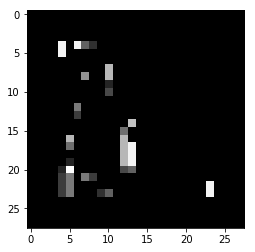

Model 1 Prediction : 2
Model 2 Prediction : 1
Model 3 Prediction : 2
Ensemble Prediction(final) : 2


This is MNIST Image! Start Predict...


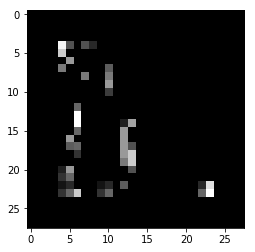

Model 1 Prediction : 2
Model 2 Prediction : 5
Model 3 Prediction : 5
Ensemble Prediction(final) : 5


This is MNIST Image! Start Predict...


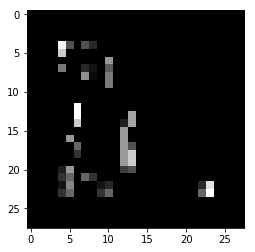

Model 1 Prediction : 2
Model 2 Prediction : 5
Model 3 Prediction : 5
Ensemble Prediction(final) : 5


This is MNIST Image! Start Predict...


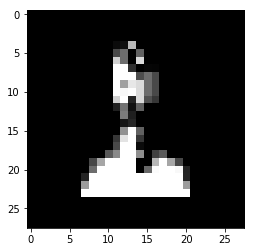

Model 1 Prediction : 2
Model 2 Prediction : 2
Model 3 Prediction : 2
Ensemble Prediction(final) : 2


This is not MNIST Image


This is MNIST Image! Start Predict...


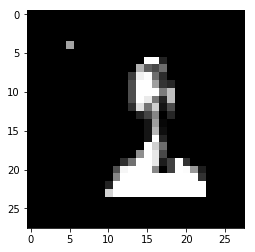

Model 1 Prediction : 1
Model 2 Prediction : 1
Model 3 Prediction : 1
Ensemble Prediction(final) : 1


This is MNIST Image! Start Predict...


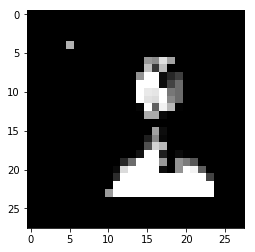

Model 1 Prediction : 2
Model 2 Prediction : 2
Model 3 Prediction : 2
Ensemble Prediction(final) : 2


This is MNIST Image! Start Predict...


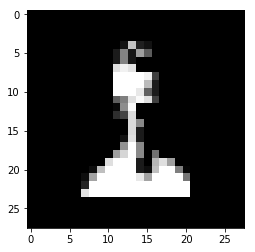

Model 1 Prediction : 2
Model 2 Prediction : 1
Model 3 Prediction : 1
Ensemble Prediction(final) : 1


This is not MNIST Image


This is MNIST Image! Start Predict...


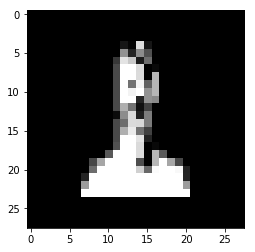

Model 1 Prediction : 2
Model 2 Prediction : 2
Model 3 Prediction : 1
Ensemble Prediction(final) : 2


This is MNIST Image! Start Predict...


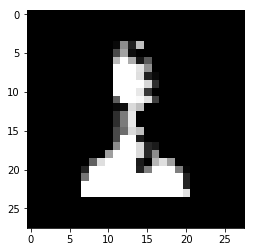

Model 1 Prediction : 2
Model 2 Prediction : 2
Model 3 Prediction : 1
Ensemble Prediction(final) : 2


This is not MNIST Image


This is MNIST Image! Start Predict...


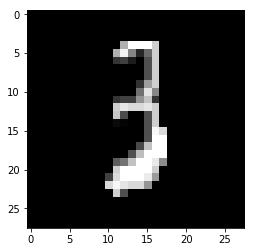

Model 1 Prediction : 3
Model 2 Prediction : 3
Model 3 Prediction : 3
Ensemble Prediction(final) : 3


This is MNIST Image! Start Predict...


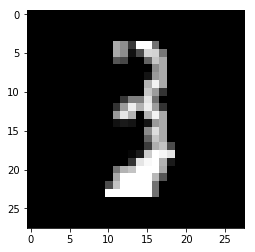

Model 1 Prediction : 3
Model 2 Prediction : 3
Model 3 Prediction : 3
Ensemble Prediction(final) : 3


This is not MNIST Image


This is not MNIST Image


This is MNIST Image! Start Predict...


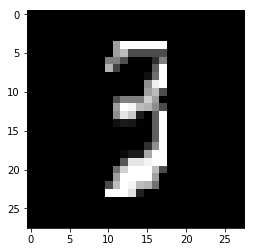

Model 1 Prediction : 3
Model 2 Prediction : 3
Model 3 Prediction : 3
Ensemble Prediction(final) : 3


In [ ]:
sock= SocketIO('127.0.0.1', 3000, LoggingNamespace) 
sock.connect()

sock.on(EVENT_CODE,receive)
sock.wait(seconds=1000)